# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives

Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time.

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the _slightly_ messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: **_which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?_**

A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

**_This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!_**

This challenge will make use of only what you learned in the following DataCamp courses:

- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One)
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following:

- **pandas**
  - **data ingestion and inspection** (pandas Foundations, Module One)
  - **exploratory data analysis** (pandas Foundations, Module Two)
  - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three)
  - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
  - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One)
  - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One)
  - **grouping data** (Manipulating DataFrames with pandas, Module Four)
  - **melting data** (Manipulating DataFrames with pandas, Module Three)
  - **advanced indexing** (Manipulating DataFrames with pandas, Module Four)
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One)
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two)
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four)


## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting.

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:

1. Sourcing and loading
2. Cleaning, transforming, and visualizing
3. Modeling
4. Evaluating and concluding


### 1. Sourcing and Loading

Any Data Science project kicks off by importing **_pandas_**. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries.

**_Hint:_** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One.


#### 1.1. Importing Libraries


In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively.
import pandas as pd
import numpy as np

import plotly.express as px


# Load the pyplot collection of functions from matplotlib, as plt
import matplotlib.pyplot as plt

In [2]:
# Change default settings for clarity
plt.style.use("ggplot")
plt.rcParams["axes.titlesize"] = "small"
plt.rcParams["xtick.labelsize"] = "xx-small"
plt.rcParams["ytick.labelsize"] = "xx-small"
# plt.rcParams.keys()

#### 1.2. Loading the data

Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets.


In [3]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file.
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.
properties = pd.read_excel(
    url_LondonHousePrices, sheet_name="Average price", index_col=None
)


### 2. Cleaning, transforming, and visualizing

This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy:

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer.

**_Hint:_** This part of the data science pipeline should test those skills you acquired in:

- Intermediate Python for data science, all modules.
- pandas Foundations, all modules.
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules


**2.1. Exploring your data**

Think about your pandas functions for checking out a dataframe.


Each column seems to represent a borough, however, there are more than 32 columns present. This is because `City of London` is not a London borough and there is also data contained for the different regions of England in the later columns.


In [4]:
print(f"Shape of data: {properties.shape}.\n")

# Look at sample of the data
display(properties.sample(5))

# First 5 rows
properties.head()

Shape of data: (339, 49).



,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
306,2020-06-01,882872.1038,300526.2859,518175.0457,340893.0807,484159.9118,425444.1926,837718.8375,372413.7578,463423.6569,...,168962.9244,168095.7058,199049.3845,202037.6347,291578.4756,478922.0948,322171.8325,259493.3119,NaN,250850.8318
329,2022-05-01,795174.941,334860.1394,584042.5146,385259.9068,529771.7571,489489.8966,856438.6491,413785.4224,516832.6597,...,206728.2541,202666.3107,240132.3095,243308.9981,346871.4707,522856.7339,384120.1445,321309.4916,NaN,299342.2639
85,2002-01-01,344238.8808,98713.31808,203249.2538,124283.022,168670.917,173150.1298,290461.3455,143107.5277,178153.7055,...,61872.20738,60884.39145,75280.47183,80653.45644,112373.6629,169840.6632,137153.8196,108959.7969,NaN,96215.43609
239,2014-11-01,762734.8047,216631.0863,448523.4892,260538.6571,412968.7306,374419.7189,769851.988,291729.8111,413241.8697,...,136864.0326,138291.0498,154008.5857,159781.61,226352.334,400803.1627,262969.0083,210798.6818,NaN,202704.1323
95,2002-11-01,280282.7987,127315.7005,235730.4701,150897.7181,203799.8894,201514.5917,332035.9209,171614.1318,213913.5253,...,74763.28177,76687.86417,96949.29545,100766.8654,140637.2607,202526.7828,164979.755,137401.1688,NaN,118692.8845


,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


The first set of 34 columns which contain the borough info we are interested in do not seem to have any values missing.

At first glance, the prices appeared to be float point numbers but on looking at the column datatypes they are actually strings. They will need to be converted before we do any statistical analysis


In [5]:
# Look for null values
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            338 non-null    datetime64[ns]
 1   City of London        339 non-null    object        
 2   Barking & Dagenham    339 non-null    object        
 3   Barnet                339 non-null    object        
 4   Bexley                339 non-null    object        
 5   Brent                 339 non-null    object        
 6   Bromley               339 non-null    object        
 7   Camden                339 non-null    object        
 8   Croydon               339 non-null    object        
 9   Ealing                339 non-null    object        
 10  Enfield               339 non-null    object        
 11  Greenwich             339 non-null    object        
 12  Hackney               339 non-null    object        
 13  Hammersmith & Fulham

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You also might find you need to assign the values of the first row to your column headings . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help with this.


Copy data so that the original set is not altered. The dataset is small so this can be done easily.


In [6]:
properties_copy = properties.copy()


Extract the columns which we are interested in. We will also:

- set the date column as the index so that the entire dataframe can be on one type.
- drop the `City of London` column as it is not one of the 32 boroughs
- convert the price values to floats,
- round all prices to the nearest dollar


In [7]:
boroughs = (
    properties_copy.iloc[1:, :34]
    .rename(columns={"Unnamed: 0": "date"})
    .set_index("date")
    .drop(columns=["City of London"])
    .applymap(float)
    .round()
)
boroughs

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,50460.0,93285.0,64958.0,71307.0,81671.0,120933.0,69158.0,79886.0,72515.0,62300.0,...,82071.0,53539.0,72190.0,109326.0,67885.0,71537.0,59865.0,61319.0,88559.0,133025.0
1995-02-01,51086.0,93190.0,64788.0,72022.0,81658.0,119509.0,68951.0,80897.0,73155.0,60993.0,...,79983.0,53154.0,72142.0,111103.0,64799.0,70893.0,62319.0,60252.0,88641.0,131468.0
1995-03-01,51269.0,92248.0,64367.0,72016.0,81449.0,120282.0,68712.0,81380.0,72190.0,61378.0,...,80662.0,53458.0,72501.0,107325.0,65763.0,70307.0,63939.0,60871.0,87125.0,132260.0
1995-04-01,53134.0,90763.0,64278.0,72966.0,81124.0,120098.0,68610.0,82189.0,71443.0,61928.0,...,79991.0,54480.0,72229.0,106875.0,63074.0,69412.0,66233.0,60971.0,87026.0,133370.0
1995-05-01,53042.0,90258.0,63997.0,73704.0,81543.0,119929.0,68845.0,82077.0,70631.0,63513.0,...,80874.0,55804.0,72367.0,107708.0,64420.0,69759.0,66433.0,61494.0,86518.0,133911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,353521.0,605114.0,406869.0,577223.0,515518.0,845840.0,433202.0,538848.0,462383.0,443327.0,...,576178.0,420345.0,484510.0,767931.0,554211.0,442184.0,486701.0,526064.0,652991.0,952191.0
2022-11-01,356903.0,596539.0,405329.0,572467.0,515314.0,834225.0,431935.0,537450.0,462978.0,444799.0,...,581756.0,425780.0,484981.0,749895.0,558980.0,443852.0,489394.0,519203.0,641455.0,941171.0
2022-12-01,356645.0,596638.0,406859.0,564118.0,515510.0,837359.0,431143.0,540902.0,464283.0,437228.0,...,577742.0,426958.0,488104.0,743271.0,553263.0,440995.0,494934.0,518504.0,638943.0,952437.0


We can now get a general overhead descriptive statistics on the numbers. We sort by mean price, so the boroughs with the highest average housing prices (most expensive) within the last 2 decades are first.


In [8]:
boroughs.describe().T.round().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
Kensington & Chelsea,338.0,809954.0,424126.0,182345.0,435444.0,773754.0,1262566.0,1512692.0
Westminster,338.0,590702.0,316857.0,131468.0,313258.0,546034.0,941524.0,1117408.0
Camden,338.0,508602.0,256347.0,115419.0,290563.0,488452.0,798611.0,890288.0
Hammersmith & Fulham,338.0,477670.0,224298.0,120636.0,280600.0,485174.0,720626.0,853871.0
Richmond upon Thames,338.0,419265.0,198411.0,106875.0,252122.0,416418.0,639388.0,767931.0
Islington,338.0,400628.0,203408.0,89406.0,230022.0,389824.0,630491.0,737280.0
Wandsworth,338.0,372832.0,184250.0,86518.0,212294.0,367012.0,584895.0,657578.0
Barnet,338.0,332801.0,155599.0,90107.0,202847.0,326414.0,508375.0,607196.0
Haringey,338.0,324114.0,169708.0,76288.0,174939.0,306187.0,517392.0,623942.0
Hackney,338.0,320421.0,182024.0,61297.0,164756.0,297356.0,521598.0,648875.0


Confirm that we do not have any null values.


In [9]:
assert boroughs.isna().sum().sum() == 0


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...


We create a helper function for renaming the column headers. This function will:

- change remove all symbols
- replace all spaces with underscores
- convert to lowercase so that column headers will now be in snake_case.<br>

We also store the original name in a dictionary for later reference.


In [10]:
def clean_column_label(label: str) -> str:
    """Helper function to convert a string of column headers to snake_case"""
    new_label = (
        label.replace(" & ", " ")
        .replace(" ", "_")
        .lower()
    )
    return new_label

In [11]:
original_columns = boroughs.columns

boroughs.columns = [clean_column_label(col) for col in original_columns]
proper_names_dict = dict(zip(boroughs.columns, original_columns))
# proper_names_dict

In [12]:

def cum_pct_change(df: pd.DataFrame) -> pd.DataFrame:
    """Function for finding the cumulative percentage change along the columns of a dataframe."""
    new_df = pd.DataFrame()
    new_df = df.pct_change().fillna(0)
    new_df = new_df + 1
    new_df = new_df.cumprod()
    return new_df


def cum_log_change(df: pd.DataFrame) -> pd.DataFrame:
    """Function to find the cumulative log difference along the column of a dataframe."""
    new_df = pd.DataFrame()
    new_df = df.apply(np.log)
    new_df = new_df.diff()
    new_df = new_df.cumsum()
    return new_df

def net_change(df: pd.DataFrame) -> pd.Series:
    """Function to find the difference between the first and last values in a column in a dataframe."""
    return df.iloc[-1] - df.iloc[0]

First with just the raw GBP amounts.

In [13]:

N = 5
net_price_changes = net_change(boroughs).nlargest(N)
print(f"Top {N} boroughs with the \033[31mhighest raw GBP\033[0m change in housing prices within the last 2 decades are:\n")
for borough, price_change in  net_price_changes.items():
    print(f"{proper_names_dict.get(borough):<20}: £{price_change:>10,.0f} increase")

Top 5 boroughs with the highest raw GBP change in housing prices within the last 2 decades are:

Kensington & Chelsea: £ 1,136,064 increase
Westminster         : £   834,992 increase
Camden              : £   727,254 increase
Richmond upon Thames: £   651,449 increase
Hammersmith & Fulham: £   641,050 increase


In [14]:
# Set for index of superlatives
superlative = set()
superlative.add(net_price_changes.index[0])

Now, considering the percent change: No borough appear to have drastic changes from the boxplot. All medians are just to the right of 0% line and all boroughs have values and outliers on both sides of the zeroline. With the exception of Islington.


In [15]:
b_pct_change = boroughs.pct_change()
b_pct_change.describe().T


,count,mean,std,min,25%,50%,75%,max
barking_dagenham,337.0,0.005796,0.012679,-0.036489,-0.001394,0.006548,0.013580,0.038950
barnet,337.0,0.005623,0.012023,-0.037607,-0.001839,0.006137,0.014322,0.033569
bexley,337.0,0.005456,0.010162,-0.028988,-0.001316,0.005003,0.012449,0.039920
brent,337.0,0.006218,0.017191,-0.118821,-0.003330,0.006891,0.016496,0.093967
bromley,337.0,0.005486,0.009748,-0.022725,-0.001061,0.005499,0.011354,0.032728
camden,337.0,0.006078,0.023817,-0.063835,-0.010727,0.006468,0.022444,0.075035
croydon,337.0,0.005456,0.010160,-0.043448,-0.000958,0.005534,0.011499,0.032820
ealing,337.0,0.005798,0.012469,-0.048686,-0.002050,0.005811,0.014149,0.041046
enfield,337.0,0.005493,0.010977,-0.031907,-0.001145,0.005509,0.013113,0.035431
greenwich,337.0,0.005955,0.013686,-0.033136,-0.002885,0.005628,0.014451,0.050885


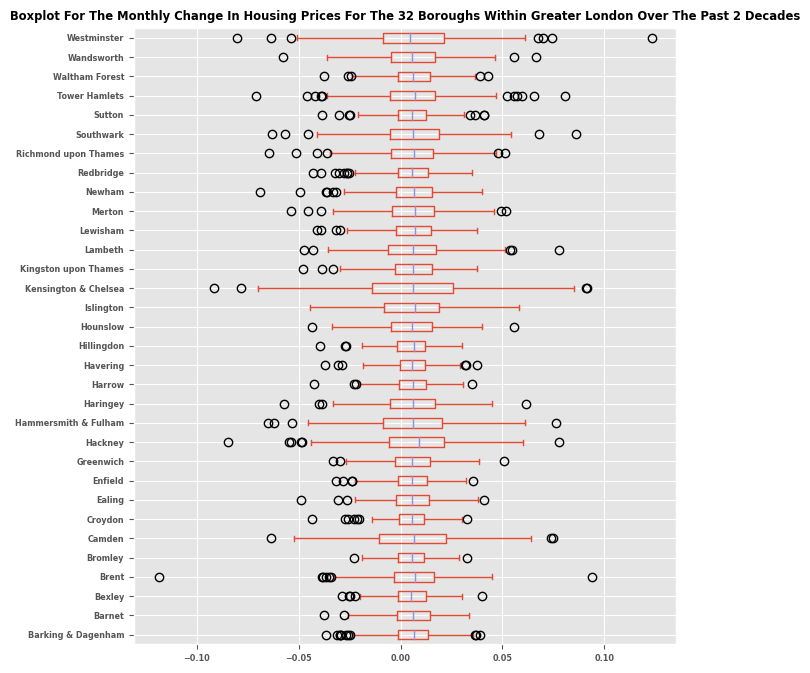

In [16]:
b_pct_change.columns = original_columns
b_pct_change.plot(
    kind="box",
    vert=False,
    figsize=(7, 8),
    sharex=True,
    sharey=True,
    title="Boxplot for the monthly change in housing prices for the 32 boroughs within greater London over the past 2 decades".title(),
);

In [17]:

nlargest_mean = b_pct_change.describe().T["mean"].nlargest(N)
nlargest_median = b_pct_change.describe().T["50%"].nlargest(N)


print(f"\nTop {N} boroughs with the \033[31mhighest mean\033[0m percent change on its monthly housing prices are:")
for borough, pct in nlargest_mean.items():
    print(f"{borough:<20}: {pct:>7.3%}")


print(f"\nTop {N} boroughs with the \033[31mhighest median\033[0m percent change on its monthly housing prices are:")
for borough, pct in nlargest_median.items():
    print(f"{borough:<20}: {pct:>7.3%}")


Top 5 boroughs with the highest mean percent change on its monthly housing prices are:
Hackney             :  0.717%
Tower Hamlets       :  0.652%
Waltham Forest      :  0.638%
Lambeth             :  0.638%
Southwark           :  0.637%

Top 5 boroughs with the highest median percent change on its monthly housing prices are:
Hackney             :  0.906%
Islington           :  0.706%
Merton              :  0.703%
Lewisham            :  0.700%
Brent               :  0.689%


In [18]:
# Dict with complement key-value pairs of proper_names_dict
improper_names_dict = {v:k for k, v in proper_names_dict.items()}

# Add top to superlative set
superlative.add(improper_names_dict.get(nlargest_mean.index[0]))
superlative.add(improper_names_dict.get(nlargest_median.index[0]))


Cumulative change shows a different story. `Hackney` looks to have the highest cumulative poercent increase in housing prices over the past 2 decades.


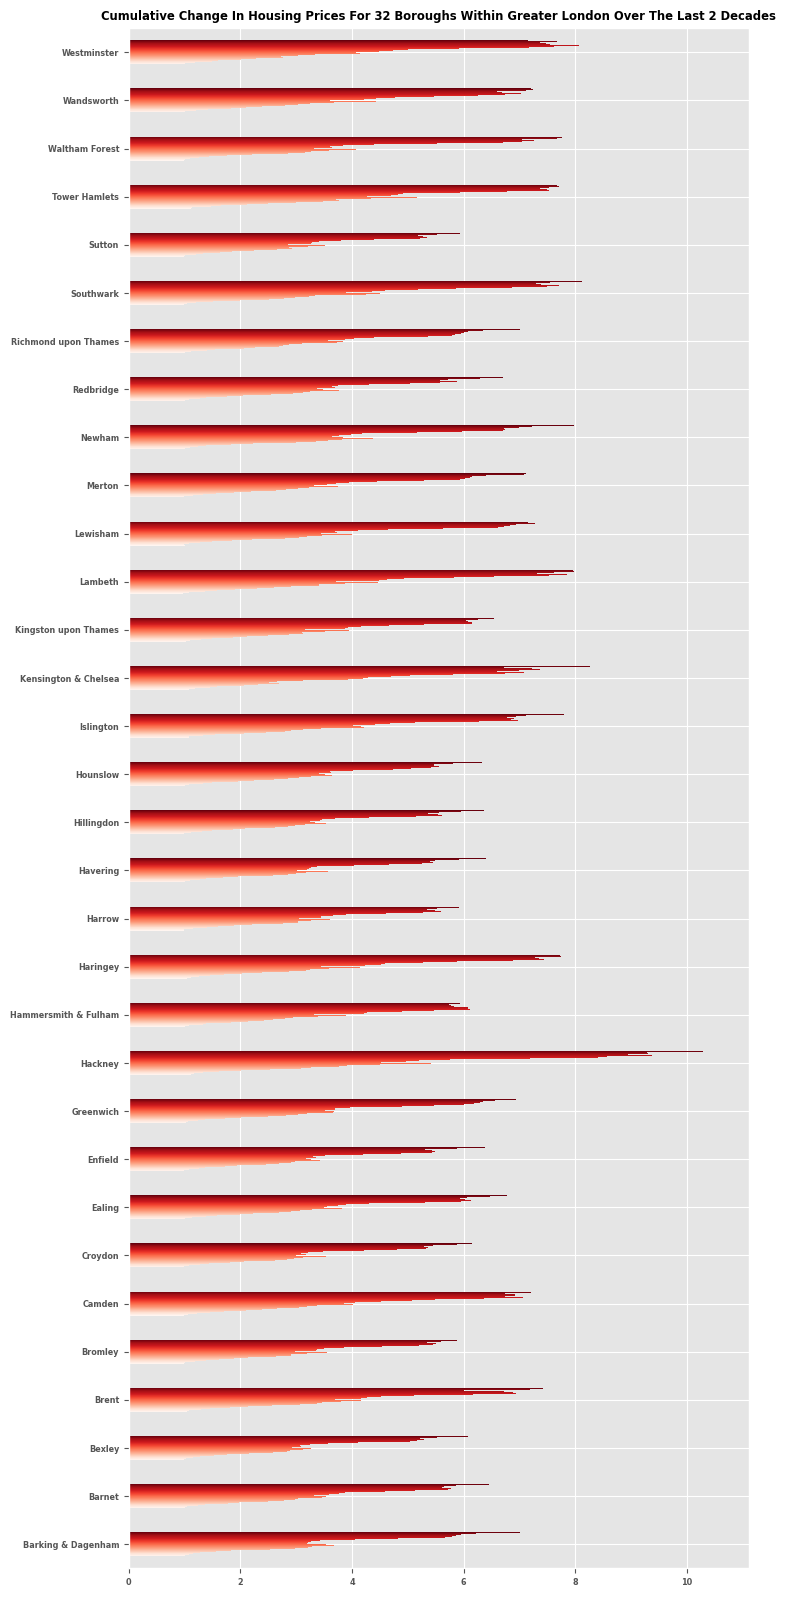

In [19]:
cum_boroughs = cum_pct_change(boroughs)
cum_boroughs.columns = original_columns

cum_boroughs.T.plot.barh(
    figsize=(8, 20),
    colormap="Reds",
    legend=False,
    title="Cumulative change in housing prices for 32 boroughs within greater London over the last 2 decades".title(),
);

In [20]:
# N=8
nsmallest_cum = cum_boroughs.iloc[-1].nsmallest(N)
nlargest_cum = cum_boroughs.iloc[-1].nlargest(N)

print(f"\nTop {N} boroughs with the \033[31mlowest\033[0m cumulative percent price change")
for borough, mul in nsmallest_cum.items():
    print(f"{borough:<20}: {mul:>2.0f} fold increase")

print(f"\nTop {N} boroughs with the \033[31mhighest\033[0m cumulative percent price change")
for borough, mul in nlargest_cum.items():
    print(f"{borough:<20}: {mul:>2.0f} fold increase")



Top 5 boroughs with the lowest cumulative percent price change
Hammersmith & Fulham:  6 fold increase
Croydon             :  6 fold increase
Bexley              :  6 fold increase
Harrow              :  6 fold increase
Enfield             :  6 fold increase

Top 5 boroughs with the highest cumulative percent price change
Hackney             : 10 fold increase
Tower Hamlets       :  8 fold increase
Waltham Forest      :  8 fold increase
Lambeth             :  8 fold increase
Southwark           :  8 fold increase


In [21]:
# Add tops to superlative set
superlative.add(improper_names_dict.get(nsmallest_cum.index[0]))
superlative.add(improper_names_dict.get(nlargest_cum.index[0]))

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data?

You might need to **melt** your DataFrame here.


In [22]:
long_boroughs = boroughs.reset_index().melt(
    id_vars="date",
    value_vars=boroughs.columns,
    var_name="london_borough",
    value_name="average_price",
)
long_boroughs

,date,london_borough,average_price
0,1995-01-01,barking_dagenham,50460.0
1,1995-02-01,barking_dagenham,51086.0
2,1995-03-01,barking_dagenham,51269.0
3,1995-04-01,barking_dagenham,53134.0
4,1995-05-01,barking_dagenham,53042.0
...,...,...,...
10811,2022-10-01,westminster,952191.0
10812,2022-11-01,westminster,941171.0
10813,2022-12-01,westminster,952437.0
10814,2023-01-01,westminster,956971.0


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers...


In [23]:
# Confirm column types
long_boroughs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10816 entries, 0 to 10815
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            10816 non-null  datetime64[ns]
 1   london_borough  10816 non-null  object        
 2   average_price   10816 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 253.6+ KB


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column?

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit.


In [24]:
assert long_boroughs.isna().sum().sum() == 0

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?


In [25]:
superlative

{'hackney', 'hammersmith_fulham', 'kensington_chelsea'}

In [26]:
df_1d = boroughs.loc['2013':] # only 1 decade
for bur in superlative:
    # Switched to plotly so that the hover feature could be handy
    
    fig = px.line(
    df_1d,
    y = bur,
    x = df_1d.index.strftime("%b"),
    color = df_1d.index.year,
    height=400,
    # line_close=True
        )
    fig.show()

To limit the number of data points you have, you might want to extract the year from every month value your _Month_ column.

To this end, you _could_ apply a **_lambda function_**. Your logic could work as follows:

1. look through the `Month` column
2. extract the year from each individual value in that column
3. store that corresponding year as separate column.

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades?


In [27]:
long_boroughs['year'] = long_boroughs['date'].dt.year
long_boroughs['month'] = long_boroughs['date'].dt.month
long_boroughs

,date,london_borough,average_price,year,month
0,1995-01-01,barking_dagenham,50460.0,1995,1
1,1995-02-01,barking_dagenham,51086.0,1995,2
2,1995-03-01,barking_dagenham,51269.0,1995,3
3,1995-04-01,barking_dagenham,53134.0,1995,4
4,1995-05-01,barking_dagenham,53042.0,1995,5
...,...,...,...,...,...
10811,2022-10-01,westminster,952191.0,2022,10
10812,2022-11-01,westminster,941171.0,2022,11
10813,2022-12-01,westminster,952437.0,2022,12
10814,2023-01-01,westminster,956971.0,2023,1


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:

1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
3. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
4. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great!

**_Hint_**: This section should test the skills you acquired in:

- Python Data Science Toolbox - Part One, all modules


In [28]:
def create_price_ratio(df: pd.DataFrame, borough: str, span: tuple[int, int] = (1998, 2018)):
    """Function to calculate the ratio of house prices, comparing the prices of a house from 2 years"""
    
    data = pd.DataFrame()
    clean_borough = clean_column_label(borough)
    
    data = df[df['london_borough'] == clean_borough]
    if data.empty:
        return None
    y1_avg = data[data['year'] == span[0]]['average_price'].mean()
    y2_avg = data[data['year'] == span[1]]['average_price'].mean()
    return round(y2_avg/y1_avg, 2)
                
    # try:
    # except KeyError as err:
        # print(f'{borough} is not a borough in the database')
        # return
    

    

In [29]:
create_price_ratio(long_boroughs, 'Camden', )
create_price_ratio(long_boroughs, 'London', ) # returns None

In [30]:
ratio_dict = {}
for borough in properties_copy.columns:
    if ratio := create_price_ratio(long_boroughs, borough):
        print(f"{borough} - {ratio}")
        ratio_dict |= {borough:ratio}
        


Barking & Dagenham - 4.9
Barnet - 4.36
Bexley - 4.25
Brent - 4.89
Bromley - 4.09
Camden - 4.94
Croydon - 4.2
Ealing - 4.31
Enfield - 4.26
Greenwich - 4.76
Hackney - 6.2
Hammersmith & Fulham - 4.14
Haringey - 5.13
Harrow - 4.06
Havering - 4.33
Hillingdon - 4.2
Hounslow - 3.98
Islington - 4.84
Kensington & Chelsea - 5.08
Kingston upon Thames - 4.27
Lambeth - 4.96
Lewisham - 5.45
Merton - 4.74
Newham - 5.31
Redbridge - 4.47
Richmond upon Thames - 4.01
Southwark - 5.52
Sutton - 4.12
Tower Hamlets - 4.63
Waltham Forest - 5.83
Wandsworth - 4.76
Westminster - 5.35


In [31]:
# Dict in descending order
{k: v for k, v in sorted(ratio_dict.items(), key=lambda item: item[1], reverse=True)}       

{'Hackney': 6.2,
 'Waltham Forest': 5.83,
 'Southwark': 5.52,
 'Lewisham': 5.45,
 'Westminster': 5.35,
 'Newham': 5.31,
 'Haringey': 5.13,
 'Kensington & Chelsea': 5.08,
 'Lambeth': 4.96,
 'Camden': 4.94,
 'Barking & Dagenham': 4.9,
 'Brent': 4.89,
 'Islington': 4.84,
 'Greenwich': 4.76,
 'Wandsworth': 4.76,
 'Merton': 4.74,
 'Tower Hamlets': 4.63,
 'Redbridge': 4.47,
 'Barnet': 4.36,
 'Havering': 4.33,
 'Ealing': 4.31,
 'Kingston upon Thames': 4.27,
 'Enfield': 4.26,
 'Bexley': 4.25,
 'Croydon': 4.2,
 'Hillingdon': 4.2,
 'Hammersmith & Fulham': 4.14,
 'Sutton': 4.12,
 'Bromley': 4.09,
 'Harrow': 4.06,
 'Richmond upon Thames': 4.01,
 'Hounslow': 3.98}

### 4. Conclusion

What can you conclude? Type out your conclusion below.

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting.

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course!
